<a href="https://colab.research.google.com/github/u1-byte/SmartRicePriceControl/blob/main/Machine%20Learning/Code/%5BCrop_Yield%5DML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODEL UNTUK MEMPREDIKSI TOTAL PRODUKSI BERAS PADA WILAYAH TERTENTU

1.   Input : Suhu, kelembaban, curah hujan, lama penyinaran, luas lahan
2.   Output : Total produksi beras
3.   Scope Input dan Output :  Data diambail rata rata dalam tiap bulan pada 3 kabupaten (Lamongan, Banyuwangi, Tuban) di Jawa Timur 
4.   Sumber : https://dataonline.bmkg.go.id/data_iklim,  https://jatim.bps.go.id/publication/2020/12/28/53ad74b4263660ce4adf0ed3/analisis-data-beras-provinsi-jawa-timur-2018-2020.html

# New Section

In [28]:
# Import library yang dibutuhkan
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import csv
from sklearn.preprocessing import MinMaxScaler

In [29]:
# Upload file dataset dari lokal
uploaded = files.upload()

Saving Database - Jawa Timur.csv to Database - Jawa Timur.csv
Saving Database - Sebelom dikasih diyan.csv to Database - Sebelom dikasih diyan.csv


# **Exploratory Data Analysis**

In [30]:
# Input data
input_suhu_ratarata = []
input_kelembaban_ratarata = []
input_curah_hujan = []
input_lama_penyinaran = []
input_luas_lahan = []
number_of_input = []
number=1

# Baca file.csv
with open('/content/Database - Jawa Timur.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    number_of_input.append(number)
    input_suhu_ratarata.append(float(row[3]))
    input_kelembaban_ratarata.append(float(row[6]))
    input_curah_hujan.append(float(row[7]))
    input_lama_penyinaran.append(float(row[8]))
    input_luas_lahan.append(float(row[9]))
    number+=1

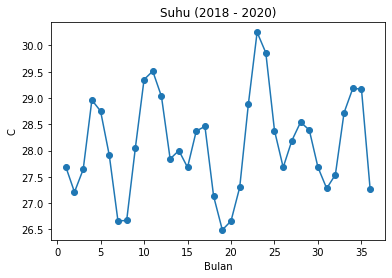

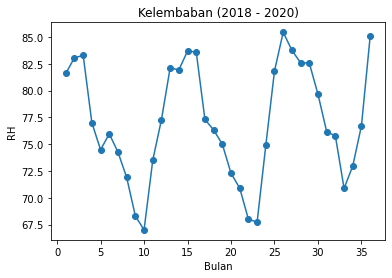

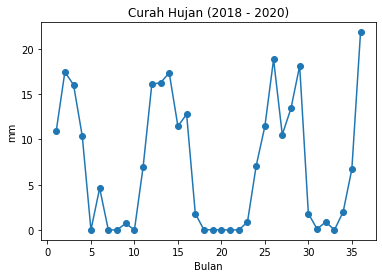

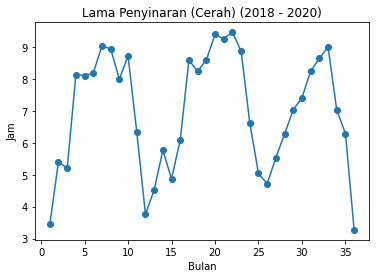

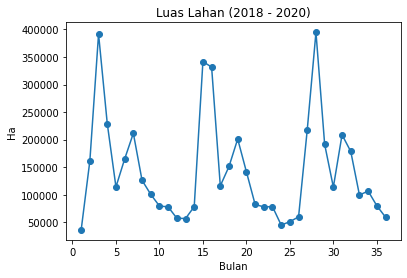

In [31]:
# Grafik dataset

# Grafik garis dari Suhu
plt.plot(number_of_input,input_suhu_ratarata,marker='o')
plt.title('Suhu (2018 - 2020)')
plt.ylabel('C')
plt.xlabel('Bulan')
plt.show()

# Grafik garis dari Kelembaban
plt.plot(number_of_input,input_kelembaban_ratarata,marker='o')
plt.title('Kelembaban (2018 - 2020)')
plt.ylabel('RH')
plt.xlabel('Bulan')
plt.show()

# Grafik garis dari Curah Hujan
plt.plot(number_of_input,input_curah_hujan,marker='o')
plt.title('Curah Hujan (2018 - 2020)')
plt.ylabel('mm')
plt.xlabel('Bulan')
plt.show()

# Grafik garis dari Lama Penyinaran
plt.plot(number_of_input,input_lama_penyinaran,marker='o')
plt.title('Lama Penyinaran (Cerah) (2018 - 2020)')
plt.ylabel('Jam')
plt.xlabel('Bulan')
plt.show()

# Grafik garis dari Luas Lahan
plt.plot(number_of_input,input_luas_lahan,marker='o')
plt.title('Luas Lahan (2018 - 2020)')
plt.ylabel('Ha')
plt.xlabel('Bulan')
plt.show()

In [32]:
# Output data
output_total_produksi_panen = []
number_of_output = []
number=1

# Baca file.csv
with open('/content/Database - Jawa Timur.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    number_of_output.append(number)
    output_total_produksi_panen.append(float(row[10]))
    number+=1

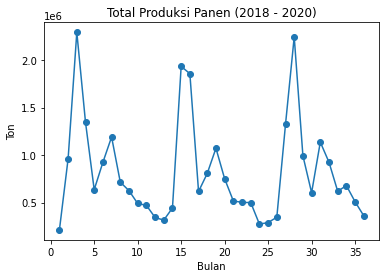

In [33]:
# Grafik data

# Grafik garis dari total produksi beras
plt.plot(number_of_output,output_total_produksi_panen,marker='o')
plt.title('Total Produksi Panen (2018 - 2020)')
plt.ylabel('Ton')
plt.xlabel('Bulan')
plt.show()

# **Data Prepocessing**

In [34]:
# Input dari data pada database
input = []
counter=0

# Baca file.csv
with open('/content/Database - Sebelom dikasih diyan.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    input.append([])
    input[counter].append(float(row[1]))
    input[counter].append(float(row[2]))
    input[counter].append(float(row[3]))
    input[counter].append(float(row[4]))
    input[counter].append(float(row[5]))
    input[counter].append(float(row[6]))
    input[counter].append(float(row[7]))
    input[counter].append(float(row[8]))
    input[counter].append(float(row[9]))
    input[counter].append(float(row[10]))
    input[counter].append(float(row[11]))
    input[counter].append(float(row[12]))
    input[counter].append(float(row[13]))
    input[counter].append(float(row[14]))
    counter+=1

input = np.array(input)

print(input)

[[2.76900e+01 2.72100e+01 2.76400e+01 2.89600e+01 8.16100e+01 8.30700e+01
  8.32900e+01 7.70000e+01 1.08800e+01 1.74500e+01 1.60300e+01 1.03700e+01
  8.14000e+00 2.29253e+05]
 [2.72100e+01 2.76400e+01 2.89600e+01 2.87500e+01 8.30700e+01 8.32900e+01
  7.70000e+01 7.44800e+01 1.74500e+01 1.60300e+01 1.03700e+01 0.00000e+00
  8.11000e+00 1.14149e+05]
 [2.76400e+01 2.89600e+01 2.87500e+01 2.79100e+01 8.32900e+01 7.70000e+01
  7.44800e+01 7.59700e+01 1.60300e+01 1.03700e+01 0.00000e+00 4.61000e+00
  8.19000e+00 1.64821e+05]
 [2.89600e+01 2.87500e+01 2.79100e+01 2.66600e+01 7.70000e+01 7.44800e+01
  7.59700e+01 7.42600e+01 1.03700e+01 0.00000e+00 4.61000e+00 0.00000e+00
  9.04000e+00 2.11502e+05]
 [2.87500e+01 2.79100e+01 2.66600e+01 2.66700e+01 7.44800e+01 7.59700e+01
  7.42600e+01 7.19000e+01 0.00000e+00 4.61000e+00 0.00000e+00 0.00000e+00
  8.95000e+00 1.26227e+05]
 [2.79100e+01 2.66600e+01 2.66700e+01 2.80500e+01 7.59700e+01 7.42600e+01
  7.19000e+01 6.83000e+01 4.61000e+00 0.00000e+00 0

In [35]:
# Output dari data pada database
output = []
counter=0

# Baca file.csv
with open('/content/Database - Sebelom dikasih diyan.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    output.append([])
    output[counter].append(float(row[15]))
    counter+=1

output = np.array(output)

print(output)

[[1345462.55]
 [ 635297.04]
 [ 923599.84]
 [1190086.94]
 [ 714606.88]
 [ 624663.23]
 [ 489721.49]
 [ 470151.11]
 [ 342637.  ]
 [ 314228.76]
 [ 442558.79]
 [1933799.6 ]
 [1857128.26]
 [ 616134.88]
 [ 806305.87]
 [1071320.17]
 [ 750277.4 ]
 [ 516564.94]
 [ 501296.  ]
 [ 499059.44]
 [ 272259.77]
 [ 288721.13]
 [ 345241.14]
 [1324020.59]
 [2243967.32]
 [ 992091.94]
 [ 603419.93]
 [1135872.36]
 [ 924107.6 ]
 [ 618728.34]
 [ 678324.07]
 [ 507859.59]
 [ 360032.71]]


In [36]:
# Bagi data untuk training, validasi dan testing
split_scaled = 33

input_scaled = input[:split_scaled]
input_test = input[split_scaled:]
output_scaled = output[:split_scaled]
output_test = output[split_scaled:]

print(len(input_scaled))
print(len(input_test))

33
0


In [37]:
# Normalisasi data
split_valid = 21

scaler_input = MinMaxScaler()
scaler_input.fit(input_scaled)
input_train_scaled = scaler_input.transform(input_scaled[:split_valid])
input_valid_scaled = scaler_input.transform(input_scaled[split_valid:])

print(input_train_scaled)
print(input_valid_scaled)

scaler_output = MinMaxScaler()
scaler_output.fit(output_scaled)
output_train_scaled = scaler_output.transform(output_scaled[:split_valid])
output_valid_scaled = scaler_output.transform(output_scaled[split_valid:])

print(output_train_scaled)
print(output_valid_scaled)

[[0.31914894 0.19148936 0.30585106 0.65691489 0.79186992 0.87100271
  0.88292683 0.54200542 0.57749469 0.92622081 0.85084926 0.47481685
  0.78548387 0.52663101]
 [0.19148936 0.30585106 0.65691489 0.60106383 0.87100271 0.88292683
  0.54200542 0.40542005 0.92622081 0.85084926 0.55042463 0.
  0.78064516 0.19773236]
 [0.30585106 0.65691489 0.60106383 0.37765957 0.88292683 0.54200542
  0.40542005 0.48617886 0.85084926 0.55042463 0.         0.21108059
  0.79354839 0.34252274]
 [0.65691489 0.60106383 0.37765957 0.04521277 0.54200542 0.40542005
  0.48617886 0.39349593 0.55042463 0.         0.24469214 0.
  0.93064516 0.47590923]
 [0.60106383 0.37765957 0.04521277 0.04787234 0.40542005 0.48617886
  0.39349593 0.26558266 0.         0.24469214 0.         0.
  0.91612903 0.23224409]
 [0.37765957 0.04521277 0.04787234 0.41489362 0.48617886 0.39349593
  0.26558266 0.0704607  0.24469214 0.         0.         0.03296703
  0.76290323 0.15927742]
 [0.04521277 0.04787234 0.41489362 0.7606383  0.39349593 0

In [38]:
# Callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<0.005):
      print("The MAE score has reached 0.005")
      self.model.stop_training = True

callbacks = myCallback()

In [43]:
# Model machine learning
model = tf.keras.Sequential([
          tf.keras.layers.Dense(units = 100, activation="relu", input_dim=14),
          tf.keras.layers.Dense(units = 10, activation="relu"),
          tf.keras.layers.Dense(units = 1, activation="relu")
        ])

opt = keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer=opt,
              loss="mean_absolute_error",
              metrics=['mae'])

model.summary()

fitting_history = model.fit(input_train_scaled, output_train_scaled, epochs = 500, validation_data=(input_valid_scaled,output_valid_scaled), callbacks=[callbacks])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 100)               1500      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 11        
Total params: 2,521
Trainable params: 2,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
1/1 [==============================] - 0s 475ms/step - loss: 0.2399 - mae: 0.2399 - val_loss: 0.1505 - val_mae: 0.1505
Epoch 2/500
1/1 [==============================] - 0s 27ms/step - loss: 0.1286 - mae: 0.1286 - val_loss: 0.2512 - val_mae: 0.2512
Epoch 3/500
1/1 [==============================] - 0s 34ms/step - loss: 0.1628 - mae: 0.1628 - val_loss: 0.2099 - val_mae

<Figure size 432x288 with 0 Axes>

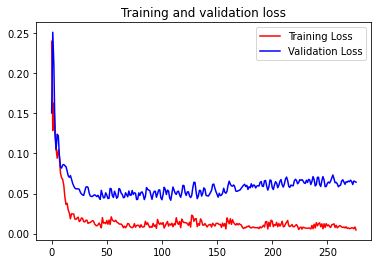

<Figure size 432x288 with 0 Axes>

In [44]:
# Grafik training dan validation loss
training_loss=fitting_history.history['loss']
validation_loss=fitting_history.history['val_loss']
epochs=range(len(training_loss))

plt.plot(epochs, training_loss, 'r', label="Training Loss")
plt.plot(epochs, validation_loss, 'b', label="Validation Loss")
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

In [45]:
# Simpan model
model.save('model-crop.h5')

# **Testing Model**

In [ ]:
# Load the model
model = tf.keras.models.load_model('model-crop.h5')

In [46]:
# Input dari data validasi
validation_data=[]
number_of_validation=[]
counter=0
number=1

for x in input_valid_scaled:
  validation_data.append([])
  for y in x:
    validation_data[counter].append(y)
  counter+=1
  number_of_validation.append(number)
  number+=1

total_of_validation=len(input_valid_scaled)
print(total_of_validation)
print(number_of_validation)

12
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [47]:
# Output dari data validasi
output_valid_transform=[]
counter=0

for i in output_valid_scaled:
  output_valid_transform.append([])
  for x in i:
    output_valid_transform[counter].append([])
    output_valid_transform[counter][0].append(i[0])
  counter+=1

print(output_valid_transform)

[[[0.008348783773739654]], [[0.037014297581809213]], [[0.533426379586567]], [[1.0]], [[0.36508059727214615]], [[0.16795602370138513]], [[0.4380023751493979]], [[0.33060066641221714]], [[0.1757200605130309]], [[0.20594550140054996]], [[0.11949024590386137]], [[0.04451620627004241]]]


In [48]:
# Prediksi data validasi
output_prediksi=[]
output_validation=[]

for i in range(total_of_validation):
  input_prediksi=[]
  input_prediksi.append([])
  for y in validation_data[i]:
    input_prediksi[0].append(y)
  prediksi = model.predict(input_prediksi)
  prediksi = scaler_output.inverse_transform(prediksi)
  output_prediksi.append(prediksi[0][0])
  valid = scaler_output.inverse_transform(output_valid_transform[i])
  output_validation.append(valid[0][0])

print(output_prediksi)
print(output_validation)

[272259.75, 272259.75, 1031274.9, 2039230.9, 1289161.1, 446973.9, 1121912.5, 1002008.0, 593334.7, 555787.9, 357501.84, 272259.75]
[288721.13, 345241.14, 1324020.59, 2243967.32, 992091.94, 603419.93, 1135872.36, 924107.6, 618728.34, 678324.07, 507859.5900000001, 360032.71]


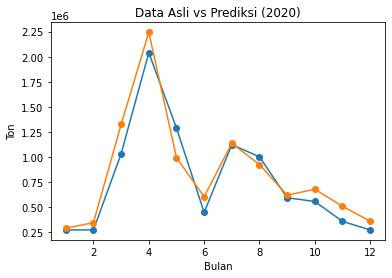

In [49]:
# Grafik garis dari total produksi panen

plt.plot(number_of_validation,output_prediksi,marker='o')
plt.plot(number_of_validation,output_validation,marker='o')
plt.title('Data Asli vs Prediksi (2020)')
plt.ylabel('Ton')
plt.xlabel('Bulan')
plt.show()